In [1]:
# Importing all the needed librairies

import pandas as pd
import matplotlib.pyplot as plt
from BDD import BDD
from Indicator import mae, bollinger
from API_Request import asset_data
import datetime as dt
import numpy as np

In [2]:
#Creating the database in order to store stock datas

cla=BDD("Asset.db")
cla.create_table("Microsoft")

# Getting datas from Alpha Vantage API
liste=asset_data("MSFT")

# Store datas in the database
cla.insert_data(liste,"Microsoft")

# Getting datas from the database and cleaning a bit
value=cla.get_data_bdd_as_df("Microsoft")
value['date'] = pd.to_datetime(value['date'])
value.set_index('date', inplace=True)

# Print data to check that everything is alright
value.head()

,open,close,high,low,volume
date,,,,,
2000-01-03,117.37,116.56,118.62,112.00,26614200.0
2000-01-04,113.56,112.62,117.12,112.25,27059500.0
2000-01-05,111.12,113.81,116.37,109.37,32029800.0
2000-01-06,112.19,110.00,113.87,108.37,27488300.0
2000-01-07,108.62,111.44,112.25,107.31,31006800.0


In [3]:
# Adding the different indicators to the DataFrame

# EMA
value['MAE_5']=mae(value,5)
value['MAE_10']=mae(value,10)

# Bollinger's Bands
value = bollinger(value,20)

# Checking the results
value.head()

C:\Users\antoi\Desktop\BDD\Indicator.py:13: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=5,min_periods=0,adjust=False,ignore_na=False).mean()
  average=ewma(data['close'],com=interval,adjust=False)
C:\Users\antoi\Desktop\BDD\Indicator.py:13: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=10,min_periods=0,adjust=False,ignore_na=False).mean()
  average=ewma(data['close'],com=interval,adjust=False)
C:\Users\antoi\Desktop\BDD\Indicator.py:20: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,min_periods=20,center=False).std()
  sigma=pd.rolling_std(data['close'], interval, min_periods=interval)


,open,close,high,low,volume,MAE_5,MAE_10,MA,MAsup,MAinf
date,,,,,,,,,,
2000-01-03,117.37,116.56,118.62,112.00,26614200.0,116.560000,116.560000,107.114,119.061762,95.166238
2000-01-04,113.56,112.62,117.12,112.25,27059500.0,115.903333,116.201818,107.114,119.061762,95.166238
2000-01-05,111.12,113.81,116.37,109.37,32029800.0,115.554444,115.984380,107.114,119.061762,95.166238
2000-01-06,112.19,110.00,113.87,108.37,27488300.0,114.628704,115.440346,107.114,119.061762,95.166238
2000-01-07,108.62,111.44,112.25,107.31,31006800.0,114.097253,115.076678,107.114,119.061762,95.166238


In [4]:
cla=BDD("Asset.db")
cla.add_column_bdd("Microsoft","MA",value)

Column already exist


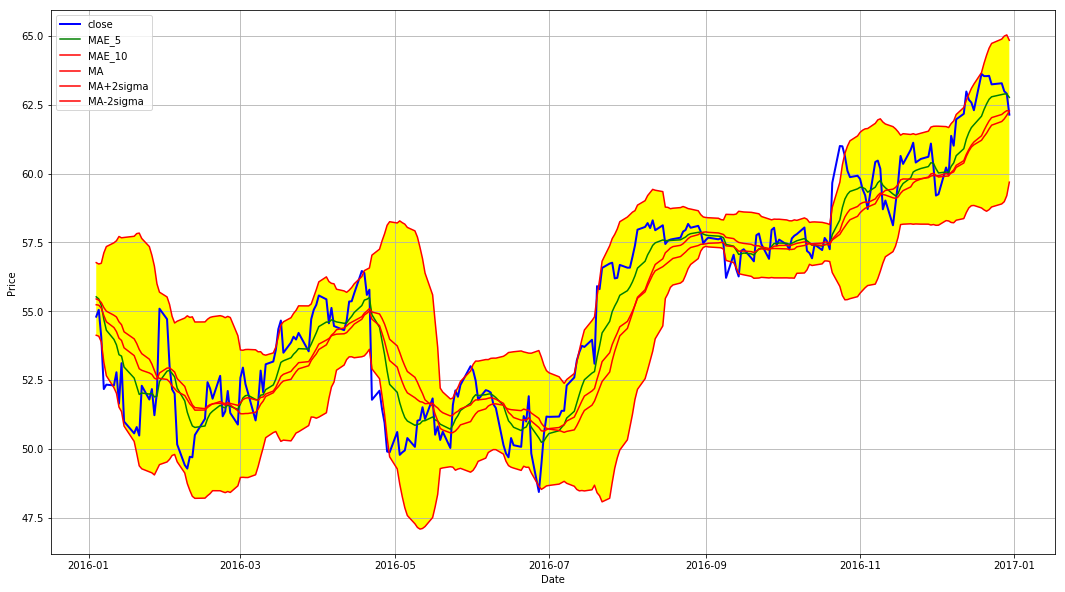

In [4]:
# Plotting all indicators and historical prices

# Subsetting for better understanding of each indicator
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2017, 1, 1)
value = value.loc[start:end]

# Setting up plotting parameters
plt.figure(num=1, figsize=(18,10))

#PLOT CLOSE VALUE
plt.plot(value['close'],'b', label='close',linewidth=2)
#PLOT FOR EXPONENTIAL MOVING AVERAGE
plt.plot(value['MAE_5'],'g',label='MAE_5')
plt.plot(value['MAE_10'],'r',label='MAE_10')

#PLOT FOR BOLLINGER
plt.plot(value['MA'],'r',label='MA')
plt.plot(value['MAsup'],'r',label='MA+2sigma')
plt.plot(value['MAinf'],'r',label='MA-2sigma')
plt.fill_between(value.index,value['MAsup'],value['MAinf'],facecolor="yellow")

plt.ylabel('Price')
plt.xlabel('Date')
 
plt.grid()
plt.legend(loc=0)

# Display everything
plt.show()